In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

##### a) The system will allow the user to retrieve data from a CSV file using the csv module and
fundamental python (control structure and file processing) to perform the following:
- Load the data from a CSV file into memory using the csv reader function. The path to the file
will be specified by the user then use these loaded data to perform following tasks:
a1. Retrieve the model name, manufacturer, weight, price, and price unit for the device(s)
based on the oem_id.

In [2]:
# Function to load data from CSV file
def load_data(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            data.append(row)
    return data

# Function to retrieve device information based on oem_id
def retrieve_by_oem_id(data, oem_id):
    result = []
    for record in data:
        if record.get('oem_id') == oem_id:
            result.append({
                'model_name': record.get('model_name'),
                'manufacturer': record.get('manufacturer'),
                'weight': record.get('weight'),
                'price': record.get('price'),
                'price_unit': record.get('price_unit')
            })
    return result

# Main function
def main():
    file_path = input("Enter the path to the CSV file: ")
    data = load_data(file_path)

    oem_id = input("Enter the oem_id to retrieve device information: ")

    # Retrieve device information based on oem_id
    result_a1 = retrieve_by_oem_id(data, oem_id)

    # Display the result
    if result_a1:
        print("\nDevice Information for oem_id", oem_id, ":", result_a1)
    else:
        print("\nNo device found with the specified oem_id.")

if __name__ == "__main__":
    main()


Enter the path to the CSV file: /content/device_features.csv
Enter the oem_id to retrieve device information: MC400

Device Information for oem_id MC400 : [{'model_name': None, 'manufacturer': 'Lenovo', 'weight': None, 'price': '4999', 'price_unit': None}, {'model_name': None, 'manufacturer': 'Lenovo', 'weight': None, 'price': '1899', 'price_unit': None}]


#### a2. Retrieve the brand, model name, RAM capacity, market regions, and the date when the information was added for device(s) associated with a specified code name.

In [3]:
data = pd.read_csv(r"/content/device_features.csv")
data

,oem_id,brand,model,released_date,announced_date,hardware_designer,manufacturer,codename,general_extras,device_category,...,usb_connector,max_charging_power,bluetooth,WLAN,additional_sensors,battery_capacity,market_regions,info_added_date,x_resolution,y_resolution
0,A135UZKAUSC,Samsung,SM-A135U Galaxy A13 2022 Standard Edition TD-L...,28-03-22,04-03-22,Samsung Electronics,Samsung Electronics,Samsung A135,Haptic touch feedback,Smartphone,...,USB C reversible,15.0,Bluetooth 5.0,"802.11a,802.11b,802.11g,802.11n,802.11ac","FP sensor,L sensor,P sensor",5000 mAh battery,North America,02-08-23 18:10,1080,2408
1,A135UZKDXAA,Samsung,SM-A135U1/DS Galaxy A13 2022 Standard Edition ...,28-03-22,04-03-22,Samsung Electronics,Samsung Electronics,Samsung A135,Haptic touch feedback,Smartphone,...,USB C reversible,15.0,Bluetooth 5.0,"802.11a,802.11b,802.11g,802.11n,802.11ac","FP sensor,L sensor,P sensor",5000 mAh battery,North America,01-08-23 09:00,1080,2408
2,A135UZKAVZW,Samsung,SM-A135U Galaxy A13 2022 Standard Edition TD-L...,28-03-22,04-03-22,Samsung Electronics,Samsung Electronics,Samsung A135,Haptic touch feedback,Smartphone,...,USB C reversible,15.0,Bluetooth 5.0,"802.11a,802.11b,802.11g,802.11n,802.11ac","FP sensor,L sensor,P sensor",5000 mAh battery,North America,31-07-23 23:26,1080,2408
3,PAYB0000JP,Motorola,Moto G53j 5G 2023 Dual SIM TD-LTE JP 128GB XT2...,16-06-23,01-05-23,Lenovo,Lenovo,Motorola Penang,Haptic touch feedback,Smartphone,...,USB C reversible,30.0,Bluetooth 5.1,"802.11a,802.11b,802.11g,802.11n,802.11ac","FP sensor,L sensor,P sensor",5000 mAh battery,Asia,23-07-23 19:14,720,1600
4,MC400,Motorola,Moto G53 5G 2022 Premium Edition TD-LTE LATAM ...,01-01-23,01-12-22,Lenovo,Lenovo,Motorola Penang,Haptic touch feedback,Smartphone,...,USB C reversible,18.0,Bluetooth 5.1,"802.11a,802.11b,802.11g,802.11n,802.11ac","FP sensor,L sensor,P sensor",5000 mAh battery,"North America,South America",23-07-23 15:52,720,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,ZS661KS-6A020EU,Asus,ROG Phone 3 5G Extreme Edition Global Dual SIM...,18-08-20,23-07-20,ASUSTeK Computer,ASUSTeK Computer,Asus I003D,Haptic touch feedback,Smartphone,...,USB C reversible,30.0,Bluetooth 5.1,"802.11a,802.11b,802.11g,802.11n,802.11ac,802.11ax","In-screen FP sensor,Hall,L sensor,P sensor,Ste...",6000 mAh battery,"Africa,Asia,Australia,Eastern Europe,Europe,Mi...",12-08-20 16:00,1080,2340
1267,PAG50053ISGB,Lenovo,Legion Phone Duel 5G Premium Edition Global Du...,01-10-20,22-07-20,Lenovo,Lenovo,Lenovo PAG500,"Haptic touch feedback,Tactile touch feedback",Smartphone,...,USB C reversible,65.0,Bluetooth 5.0,"802.11a,802.11b,802.11g,802.11n,802.11ac,802.11ax","In-screen FP sensor,Hall,L sensor,P sensor",5000 mAh battery,"Africa,Asia,Eastern Europe,Europe,Middle East,...",11-08-20 14:00,1080,2340
1268,MC361,Motorola,Moto G 5G Plus 2020 Global Dual SIM TD-LTE 128...,19-07-20,01-07-20,Motorola Mobile Devices,Lenovo,Motorola Nairobi,Haptic touch feedback,Smartphone,...,USB C reversible,20.0,Bluetooth 5.1,"802.11a,802.11b,802.11g,802.11n,802.11ac","FP sensor,L sensor,P sensor",5000 mAh battery,"Asia,Australia,Eastern Europe,Europe,Middle Ea...",21-07-20 22:15,1080,2520
1269,G986UZPAXAA,Samsung,SM-G986U1 Galaxy S20+ 5G BTS Edition TD-LTE US...,16-07-20,14-06-20,Samsung Electronics,Samsung Electronics,Samsung Hubble 1 5G,Haptic touch feedback,Smartphone,...,USB C reversible,25.0,Bluetooth 5.0,"802.11a,802.11b,802.11i,802.11g,802.11n,802.11...","Barometer,In-screen FP sensor,Hall,HR sensor,L...",4500 mAh battery,North America,16-07-20 10:41,1440,3200


In [4]:
def retrieve_device_info_by_codename(data, codename):
    # Ensure data is a list of dictionaries
    if not isinstance(data, list) or not all(isinstance(device, dict) for device in data):
        raise ValueError("Input data must be a list of dictionaries.")

    return [
        {
            'brand': device.get('brand'),
            'model_name': device.get('model'),
            'ram_capacity': device.get('ram_capacity'),
            'market_regions': device.get('market_regions'),
            'info_added_date': device.get('info_added_date')
        }
        for device in data
        if device.get('codename') == codename
    ]


In [5]:
# Main function
def main():
    file_path = input("Enter the path to the CSV file: ")
    csv_data = load_data(file_path)

    codename = input("Enter the codename to retrieve device information: ")

    # Retrieve device information based on codename
    result_a2 = retrieve_device_info_by_codename(csv_data, codename)

    # Display the result
    if result_a2:
        print("\nDevice Information for codename", codename, ":", result_a2)
    else:
        print("\nNo device found with the specified codename.")

if __name__ == "__main__":
    main()

Enter the path to the CSV file: /content/device_features.csv
Enter the codename to retrieve device information: Samsung A135

Device Information for codename Samsung A135 : [{'brand': 'Samsung', 'model_name': 'SM-A135U Galaxy A13 2022 Standard Edition TD-LTE US 32GB / SM-A135R4', 'ram_capacity': '3', 'market_regions': 'North America', 'info_added_date': '02-08-23 18:10'}, {'brand': 'Samsung', 'model_name': 'SM-A135U1/DS Galaxy A13 2022 Standard Edition Dual SIM TD-LTE US 32GB', 'ram_capacity': '3', 'market_regions': 'North America', 'info_added_date': '01-08-23 09:00'}, {'brand': 'Samsung', 'model_name': 'SM-A135U Galaxy A13 2022 Standard Edition TD-LTE US 32GB / SM-A135V', 'ram_capacity': '3', 'market_regions': 'North America', 'info_added_date': '31-07-23 23:26'}, {'brand': 'Samsung', 'model_name': 'SM-A135U Galaxy A13 2022 Standard Edition Dual SIM TD-LTE US 32GB / SM-A135T', 'ram_capacity': '3', 'market_regions': 'North America', 'info_added_date': '21-07-23 22:38'}, {'brand': 'Sam

##### a3. Retrieve the oem_id, release date, announcement date, dimensions, and device category of the device(s) based on a specified RAM capacity.

In [6]:

def retrieve_device_info_by_ram_capacity(data, ram_capacity):
    result = []
    for device in data:
        if device['ram_capacity'] == ram_capacity:
            result.append({
                'oem_id': device['oem_id'],
                'released_date': device['released_date'],
                'announced_date': device['announced_date'],
                'dimensions': device['dimensions'],
                'device_category': device['device_category']
            })
    return result

In [7]:
# Main function
def main():
    file_path = input("Enter the path to the CSV file: ")
    csv_data = load_data(file_path)

    ram_capacity = input("Enter the RAM capacity to retrieve device information: ")

    # Retrieve device information based on RAM capacity
    result_a3 = retrieve_device_info_by_ram_capacity(csv_data, ram_capacity)

    # Display the result
    if result_a3:
        print(f"\nDevice Information for RAM capacity {ram_capacity}:", result_a3)
    else:
        print(f"\nNo device found with the specified RAM capacity.")

if __name__ == "__main__":
    main()

Enter the path to the CSV file: /content/device_features.csv
Enter the RAM capacity to retrieve device information: 6

Device Information for RAM capacity 6: [{'oem_id': 'MC400', 'released_date': '01-01-23', 'announced_date': '01-12-22', 'dimensions': '2.94x6.41x0.32 inches', 'device_category': 'Smartphone'}, {'oem_id': 'MZB0CXQIN', 'released_date': '06-01-23', 'announced_date': '01-12-22', 'dimensions': '2.99x6.41x0.31 inches', 'device_category': 'Smartphone'}, {'oem_id': 'ZAAM0111IN', 'released_date': '01-06-22', 'announced_date': '01-05-22', 'dimensions': '9.89x6.25x0.29 inches', 'device_category': 'Tablet'}, {'oem_id': 'ZAAN0193IN', 'released_date': '01-06-22', 'announced_date': '25-05-22', 'dimensions': '9.89x6.25x0.29 inches', 'device_category': 'Tablet'}, {'oem_id': 'AI2202-1B035ID', 'released_date': '01-09-22', 'announced_date': '28-07-22', 'dimensions': '2.68x5.73x0.36 inches', 'device_category': 'Smartphone'}, {'oem_id': 'AI2202-1A028BR', 'released_date': '01-09-22', 'announc

##### a4. Retrieve information from your chosen columns and apply a specific condition that relates to an individual device. Please select at least three columns and one condition that differs from previous requirements.

In [8]:
# Function to retrieve device information based on a specific condition
def retrieve_with_condition(data):
    result = []
    for device in data:
        # Condition: Display refresh rate greater than 90 Hz (converted to int)
        if int(device['display_refresh_rate']) > 90:
            result.append({
                'oem_id': device['oem_id'],
                'display_refresh_rate': int(device['display_refresh_rate']),
                'display_type': device['display_type'],
                'market_regions': device['market_regions']
            })
    return result

In [9]:
# Main function
def main():
    file_path = input("Enter the path to the CSV file: ")
    csv_data = load_data(file_path)

    # Retrieve device information based on a specific condition
    result_a4 = retrieve_with_condition(csv_data)

    # Display the result
    if result_a4:
        print("\nDevice Information for devices with display refresh rate > 90 Hz:", result_a4)
    else:
        print("\nNo devices found with the specified condition.")

if __name__ == "__main__":
    main()

Enter the path to the CSV file: /content/device_features.csv

Device Information for devices with display refresh rate > 90 Hz: [{'oem_id': 'PAYB0000JP', 'display_refresh_rate': 120, 'display_type': 'Color IPS TFT LCDdisplay', 'market_regions': 'Asia'}, {'oem_id': 'MC400', 'display_refresh_rate': 120, 'display_type': 'Color IPS TFT LCDdisplay', 'market_regions': 'North America,South America'}, {'oem_id': 'MC400', 'display_refresh_rate': 120, 'display_type': 'Color IPS TFT LCDdisplay', 'market_regions': 'Central America,South America'}, {'oem_id': 'MC401', 'display_refresh_rate': 120, 'display_type': 'Color IPS TFT LCDdisplay', 'market_regions': 'Asia,Australia,Eastern Europe,Europe,Middle East,South America,Western Europe'}, {'oem_id': 'MZB0D87EU', 'display_refresh_rate': 120, 'display_type': 'AM-OLEDdisplay', 'market_regions': 'Asia,Eastern Europe,Europe,Middle East,Southeast Asia,Western Europe'}, {'oem_id': 'MZB0D87EU', 'display_refresh_rate': 120, 'display_type': 'AM-OLEDdisplay', 

In [10]:
from prettytable import PrettyTable

# Function to retrieve device information based on a specific condition
def retrieve_with_condition(data):
    result = []
    for device in data:
        # Condition: Display refresh rate greater than 90 Hz (converted to int)
        if int(device['display_refresh_rate']) > 90:
            result.append({
                'oem_id': device['oem_id'],
                'display_refresh_rate': int(device['display_refresh_rate']),
                'display_type': device['display_type'],
                'market_regions': device['market_regions']
            })
    return result

# Function to display result in table format
def display_result_table(result):
    if result:
        table = PrettyTable()
        table.field_names = ["OEM ID", "Display Refresh Rate", "Display Type", "Market Regions"]

        for device in result:
            table.add_row([device['oem_id'], device['display_refresh_rate'], device['display_type'], device['market_regions']])

        print(table)
    else:
        print("\nNo devices found with the specified condition.")

# Main function
def main():
    file_path = input("Enter the path to the CSV file: ")
    csv_data = load_data(file_path)

    # Retrieve device information based on a specific condition
    result_a4 = retrieve_with_condition(csv_data)

    # Display the result in table format
    display_result_table(result_a4)

if __name__ == "__main__":
    main()


Enter the path to the CSV file: /content/device_features.csv
+--------------------+----------------------+--------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------+
|       OEM ID       | Display Refresh Rate |       Display Type       |                                                                    Market Regions                                                                   |
+--------------------+----------------------+--------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------+
|     PAYB0000JP     |         120          | Color IPS TFT LCDdisplay |                                                                         Asia                                                                        |
|       MC400        |         120          | C

#### The system will allow the user to analyse/query data using the pandas module to perform the
following:
- Load data from a CSV file into memory using the pandas module. Use the file path received
from task a) for this purpose. After loading the data, proceed with the following tasks.

In [11]:
# Function to load data into a DataFrame using pandas
def load_data_pandas(file_path):
    return pd.read_csv(file_path)

# Function to retrieve device information based on oem_id using pandas
def retrieve_by_oem_id_pandas(data, oem_id):
    return data[data['oem_id'] == oem_id].loc[:, ['model', 'manufacturer', 'weight_gram', 'price', 'price_currency']]

# Function to retrieve device information based on code name using pandas
def retrieve_by_code_name_pandas(data, code_name):
    return data[data['codename'] == code_name].loc[:, ['brand', 'model', 'ram_capacity', 'market_regions', 'info_added_date']]

# Function to retrieve device information based on RAM capacity using pandas
def retrieve_by_ram_capacity_pandas(data, ram_capacity):
    return data[data['ram_capacity'] == ram_capacity].loc[:, ['oem_id', 'released_date', 'announced_date', 'dimensions', 'device_category']]

# Function to retrieve device information based on a specific condition using pandas
def retrieve_with_condition_pandas(data):
    return data[data['display_refresh_rate'].astype(int) > 90].loc[:, ['oem_id', 'display_refresh_rate', 'display_type', 'market_regions']]

In [12]:
from tabulate import tabulate

In [13]:
# Function to display result in table format
def display_result_table_pandas(result):
    if not result.empty:
        print(tabulate(result, headers='keys', tablefmt='pretty'))
    else:
        print("\nNo devices found with the specified condition.")

In [14]:
# Main function
def main():
    file_path = input("Enter the path to the CSV file: ")
    df_data = load_data_pandas(file_path)

    oem_id = input("Enter the oem_id to retrieve device information: ")
    result_a1 = retrieve_by_oem_id_pandas(df_data, oem_id)
    print("\nResult for Task a1:")
    display_result_table_pandas(result_a1)

    code_name = input("Enter the code name to retrieve device information: ")
    result_a2 = retrieve_by_code_name_pandas(df_data, code_name)
    print("\nResult for Task a2:")
    display_result_table_pandas(result_a2)

    ram_capacity = input("Enter the RAM capacity to retrieve device information: ")
    result_a3 = retrieve_by_ram_capacity_pandas(df_data, int(ram_capacity))
    print("\nResult for Task a3:")
    display_result_table_pandas(result_a3)

    result_a4 = retrieve_with_condition_pandas(df_data)
    print("\nResult for Task a4:")
    display_result_table_pandas(result_a4)

if __name__ == "__main__":
    main()

Enter the path to the CSV file: /content/device_features.csv
Enter the oem_id to retrieve device information: MC400

Result for Task a1:
+---+------------------------------------------------------------------------+--------------+-------------+--------+----------------+
|   |                                 model                                  | manufacturer | weight_gram | price  | price_currency |
+---+------------------------------------------------------------------------+--------------+-------------+--------+----------------+
| 4 |      Moto G53 5G 2022 Premium Edition TD-LTE LATAM 128GB XT2335-1      |    Lenovo    |    183.0    | 4999.0 |      MXN       |
| 5 | Moto G53 5G 2022 Standard Edition Dual SIM TD-LTE LATAM 128GB XT2335-1 |    Lenovo    |    183.0    | 1899.0 |      BRL       |
+---+------------------------------------------------------------------------+--------------+-------------+--------+----------------+
Enter the code name to retrieve device information: Samsung

##### b1. Identify the top 5 regions where a specific brand of devices was sold.

In [15]:
# Function to identify the top 5 regions for a specific brand
def top_regions_for_brand(data, brand):
    brand_data = data[data['brand'] == brand]
    top_regions = brand_data['market_regions'].str.split(', ').explode().value_counts().head(5)
    return top_regions


In [16]:
# Main function
def main():
    file_path = input("Enter the path to the CSV file: ")
    df_data = load_data_pandas(file_path)

    brand = input("Enter the brand to identify the top 5 regions: ")

    # Identify the top 5 regions for the specified brand
    top_regions = top_regions_for_brand(df_data, brand)

    # Display the result
    if not top_regions.empty:
        print(f"\nTop 5 regions for {brand} devices:")
        print(top_regions)
    else:
        print(f"\nNo data found for {brand} devices.")

if __name__ == "__main__":
    main()

Enter the path to the CSV file: /content/device_features.csv
Enter the brand to identify the top 5 regions: Motorola

Top 5 regions for Motorola devices:
Asia                                         21
North America                                21
North America,South America                  16
South America                                11
Asia,Eastern Europe,Europe,Western Europe     7
Name: market_regions, dtype: int64


####  b2. Analyse the average price of devices within a specific brand, all in the same currency.

In [17]:
# Function to analyze the average price of devices within a specific brand
def average_price_for_brand(data, brand):
    brand_data = data[data['brand'] == brand]
    average_price = brand_data.groupby('price_currency')['price'].mean()
    return average_price

In [18]:
# Main function
def main():
    file_path = input("Enter the path to the CSV file: ")
    df_data = load_data_pandas(file_path)

    brand = input("Enter the brand to analyze the average price: ")

    # Analyze the average price for the specified brand
    average_price = average_price_for_brand(df_data, brand)

    # Display the result
    if not average_price.empty:
        print(f"\nAverage prices for {brand} devices (all in the same currency):")
        print(average_price)
    else:
        print(f"\nNo data found for {brand} devices.")

if __name__ == "__main__":
    main()

Enter the path to the CSV file: /content/device_features.csv
Enter the brand to analyze the average price: Samsung

Average prices for Samsung devices (all in the same currency):
price_currency
AED    1.049000e+03
AUD    1.234000e+03
BRL    1.827571e+03
CAD    1.454945e+03
CNY    9.277125e+03
EUR    8.897697e+02
GBP    7.150000e+02
HKD    8.848100e+03
HUF    1.019467e+05
IDR    6.943444e+06
INR    8.221388e+04
JPY    1.467874e+05
KRW    1.202600e+06
MXN    9.010357e+03
MYR    1.974000e+03
PLN    1.724000e+03
RUB    2.190000e+04
SGD    5.980000e+02
TRY    6.999000e+03
TWD    2.142681e+04
USD    1.016129e+03
Name: price, dtype: float64


##### b3. Analyse the average mass for each manufacturer and display the list of average mass for all manufacturers.

In [19]:
# Function to analyze the average price of devices within a specific brand
def average_price_for_brand(data, brand):
    brand_data = data[data['brand'] == brand]
    average_price = brand_data.groupby('price_currency')['price'].mean()
    return average_price

In [20]:
# Main function
def main():
    file_path = input("Enter the path to the CSV file: ")
    df_data = load_data_pandas(file_path)

    brand = input("Enter the brand to analyze the average price: ")

    # Analyze the average price for the specified brand
    average_price = average_price_for_brand(df_data, brand)

    # Display the result
    if not average_price.empty:
        print(f"\nAverage prices for {brand} devices (all in the same currency):")
        print(average_price)
    else:
        print(f"\nNo data found for {brand} devices.")

if __name__ == "__main__":
    main()

Enter the brand to analyze the average price: Samsung

Average prices for Samsung devices (all in the same currency):
price_currency
AED    1.049000e+03
AUD    1.234000e+03
BRL    1.827571e+03
CAD    1.454945e+03
CNY    9.277125e+03
EUR    8.897697e+02
GBP    7.150000e+02
HKD    8.848100e+03
HUF    1.019467e+05
IDR    6.943444e+06
INR    8.221388e+04
JPY    1.467874e+05
KRW    1.202600e+06
MXN    9.010357e+03
MYR    1.974000e+03
PLN    1.724000e+03
RUB    2.190000e+04
SGD    5.980000e+02
TRY    6.999000e+03
TWD    2.142681e+04
USD    1.016129e+03
Name: price, dtype: float64


##### b4. Analyse the data to derive meaningful insights based on your unique selection, distinct from the previous requirements.

In [21]:
# Function to derive insights based on screen size and resolution
def derive_screen_insights(data):
    # Calculate pixel density (pixels per inch)
    data['pixel_density'] = (data['x_resolution']**2 + data['y_resolution']**2)**0.5 / data['display_diagonal']

    # Sort data by pixel density in descending order
    sorted_data = data.sort_values(by='pixel_density', ascending=False)

    # Identify device with the highest pixel density
    max_pixel_density_device = sorted_data.iloc[0]

    return max_pixel_density_device

In [22]:
# Main function
def main():
    file_path = input("Enter the path to the CSV file: ")
    df_data = load_data_pandas(file_path)

    # Derive insights based on screen size and resolution
    max_pixel_density_device = derive_screen_insights(df_data)

    # Display the result
    print("\nDevice with the highest pixel density:")
    print(max_pixel_density_device)

if __name__ == "__main__":
    main()

Enter the path to the CSV file: /content/device_features.csv

Device with the highest pixel density:
oem_id                                                                   XQBE62/B
brand                                                                        Sony
model                             Xperia Pro-I 2021 5G Dual SIM TD-LTE NA XQ-BE62
released_date                                                            11-12-21
announced_date                                                           26-10-21
hardware_designer                                                            Sony
manufacturer                                                                 Sony
codename                                                             Sony PDX-217
general_extras                       Haptic touch feedback,Tactile touch feedback
device_category                                                        Smartphone
width                                                                        72

c) The system will allow the user to visualise the data using the matplotlib module as follows:
- Load data from a CSV file into memory. Use the file path received from task a) for this purpose.
After loading the data, proceed with the following tasks.
c1. Create a chart to visually represent the proportion of RAM types for devices in the
current market.

In [23]:
# Function to create a chart for the proportion of RAM types with different colors
def create_ram_type_chart(data):
    ram_type_counts = data['ram_type'].value_counts()

    # Define different colors for each RAM type
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightblue']

    plt.figure(figsize=(8, 8))
    plt.pie(ram_type_counts, labels=ram_type_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    plt.title('Proportion of RAM Types for Devices in the Current Market')
    plt.show()

Enter the path to the CSV file: /content/device_features.csv


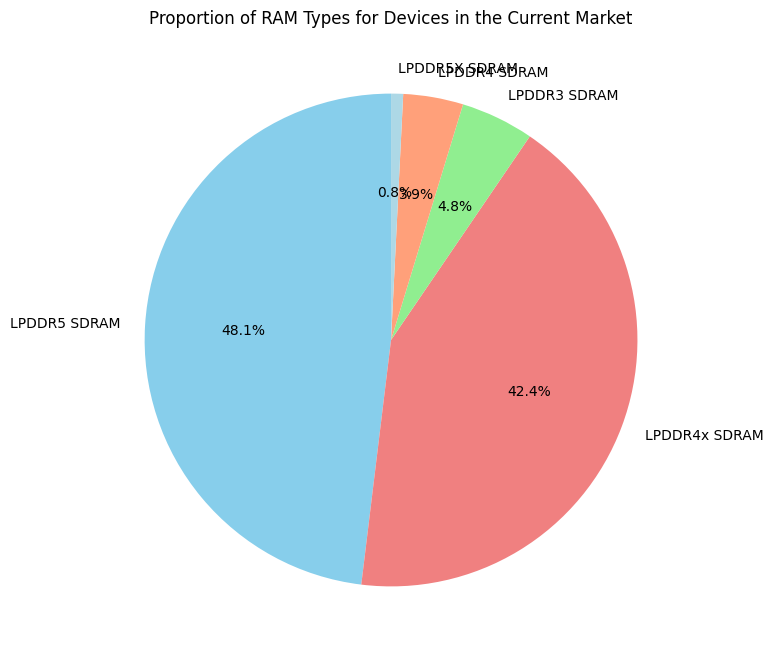

In [24]:
# Main function
def main():
    file_path = input("Enter the path to the CSV file: ")
    df_data = load_data_pandas(file_path)

    # Create a chart for the proportion of RAM types
    create_ram_type_chart(df_data)

if __name__ == "__main__":
    main()

c2. Create a chart to visually compare the number of devices for each USB connector type

In [25]:
# Function to create a chart for the number of devices for each USB connector type
def create_usb_connector_chart(data):
    usb_connector_counts = data['usb_connector'].value_counts()

    plt.figure(figsize=(10, 6))
    usb_connector_counts.plot(kind='bar', color='skyblue')
    plt.title('Number of Devices for Each USB Connector Type')
    plt.xlabel('USB Connector Type')
    plt.ylabel('Number of Devices')
    plt.xticks(rotation=45, ha='right')
    plt.show()

Enter the path to the CSV file: /content/device_features.csv


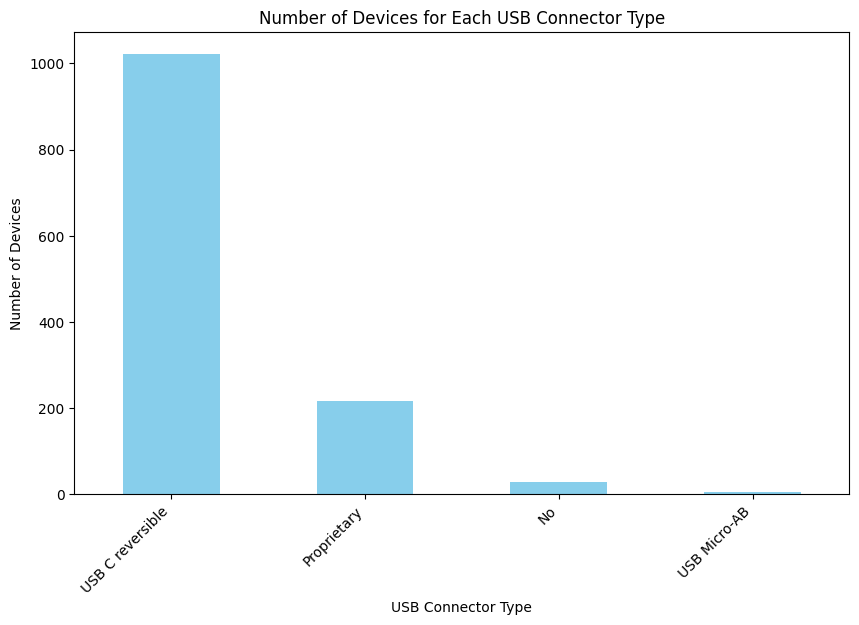

In [26]:
# Main function
def main():
    file_path = input("Enter the path to the CSV file: ")
    df_data = load_data_pandas(file_path)

    # Create a chart for the number of devices for each USB connector type
    create_usb_connector_chart(df_data)

if __name__ == "__main__":
    main()

##### c3. Create separate charts illustrating the monthly average price trends (in GBP) for devices released in each year from 2020 to 2023. Each chart should focus on a specific year.

In [27]:
# Function to convert price to GBP if not already in GBP
def convert_to_gbp(row):
    if row['price_currency'] != 'GBP':
        # Assuming a conversion factor (adjust as needed)
        return row['price'] * 0.85
    return row['price']

In [28]:
# Function to create a chart for the monthly average price trends for each year
def create_price_trends_charts(data):
    # Convert prices to GBP if not already in GBP
    data['price_gbp'] = data.apply(convert_to_gbp, axis=1)

    # Extract the year from the 'released_date' column
    data['year'] = pd.to_datetime(data['released_date']).dt.year

    # Filter data for the years 2020 to 2023
    for year in range(2020, 2024):
        year_data = data[data['year'] == year]

        # Group data by month and calculate the average price for each month
        monthly_avg_price = year_data.groupby(pd.to_datetime(year_data['released_date']).dt.month)['price_gbp'].mean()

        plt.figure(figsize=(10, 6))
        plt.plot(monthly_avg_price.index, monthly_avg_price.values, marker='o', label=f'Year {year}')
        plt.title(f'Monthly Average Price Trends (GBP) - {year}')
        plt.xlabel('Month')
        plt.ylabel('Average Price (GBP)')
        plt.legend()
        plt.show()

Enter the path to the CSV file: /content/device_features.csv


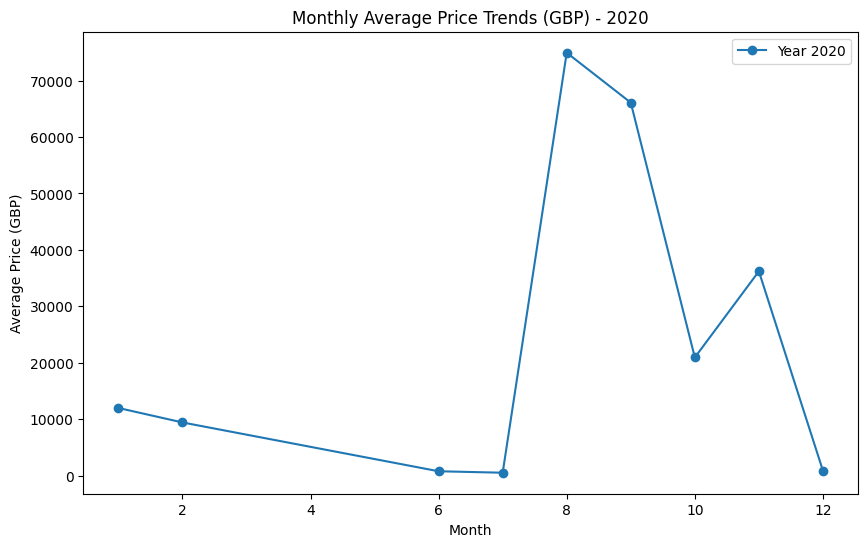

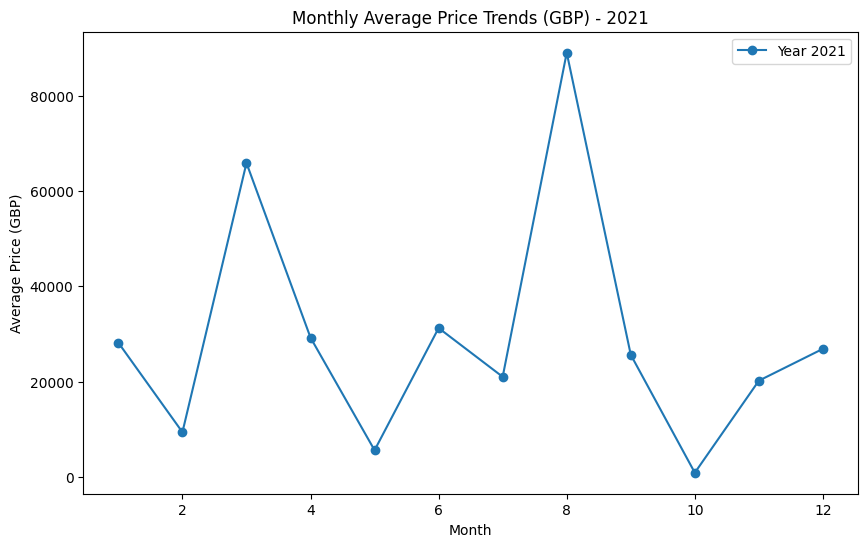

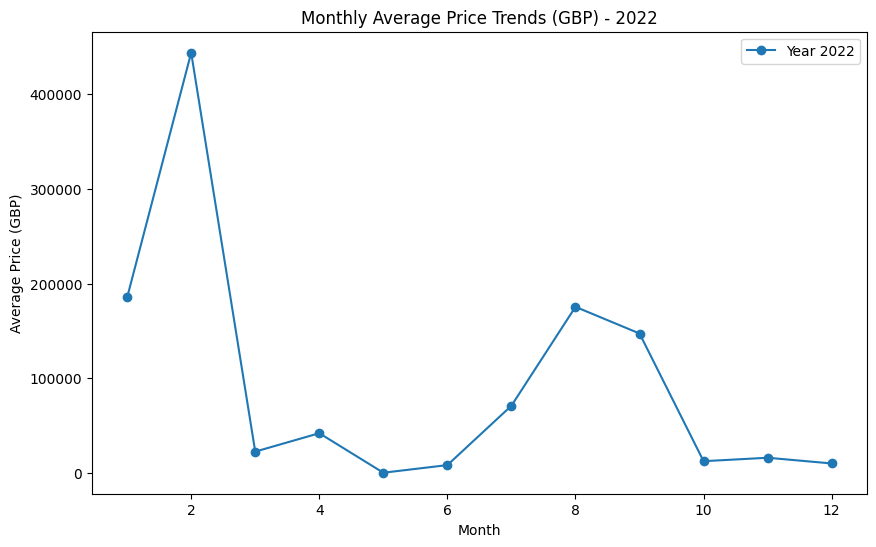

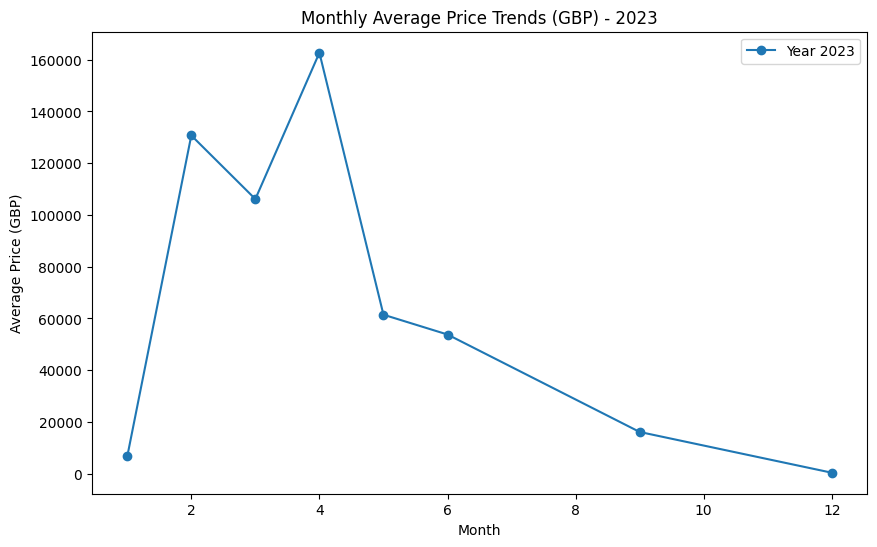

In [29]:
# Main function
def main():
    file_path = input("Enter the path to the CSV file: ")
    df_data = load_data_pandas(file_path)

    # Create charts for the monthly average price trends for each year
    create_price_trends_charts(df_data)

if __name__ == "__main__":
    main()

##### c4. Create a visualisation of your selection to showcase information related to device features that can reveal trends, behaviours, or patterns, ensuring it is distinct from previous requirements.

In [30]:
# Function to create a scatter plot for device weight vs. price
def create_scatter_plot(data):
    plt.figure(figsize=(10, 6))
    plt.scatter(data['weight_gram'], data['price'], alpha=0.5)
    plt.title('Scatter Plot: Device Weight vs. Price')
    plt.xlabel('Device Weight (grams)')
    plt.ylabel('Device Price')
    plt.show()

Enter the path to the CSV file: /content/device_features.csv


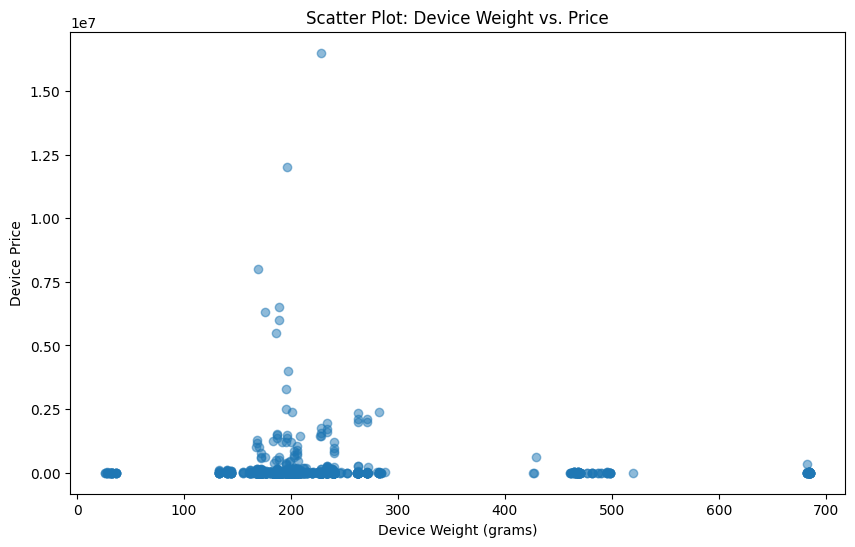

In [31]:
# Main function
def main():
    file_path = input("Enter the path to the CSV file: ")
    df_data = load_data_pandas(file_path)

    # Create a scatter plot for device weight vs. price
    create_scatter_plot(df_data)

if __name__ == "__main__":
    main()